In [2]:
import warnings
warnings.filterwarnings('ignore')

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
df=pd.read_csv('/content/drive/MyDrive/crop_yield_dataset.csv')
print(df.head().to_string())

   Temperature (°C)  Rainfall (mm)  Humidity (%) Soil Type Weather Condition Crop Type  Yield (tons/hectare)
0         22.490802     185.132929     53.085284     Sandy             Sunny    Barley              2.818937
1         34.014286     541.900947     52.348940     Loamy             Sunny      Corn              8.014166
2         29.639879     872.945836     85.312729     Peaty             Rainy     Wheat              9.249868
3         26.973170     732.224886     52.477310     Sandy             Sunny  Soybeans              7.947481
4         18.120373     806.561148     53.597486      Clay            Stormy    Barley              6.262616


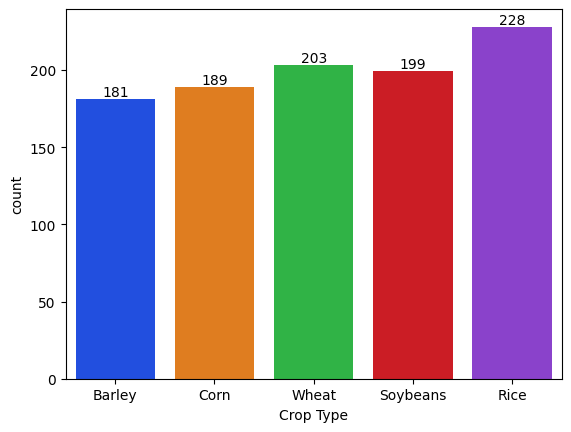

In [4]:
ax = sns.countplot(x='Crop Type', data=df, palette='bright')
for container in ax.containers:
    ax.bar_label(container, fontsize=10, color='black')
plt.show()

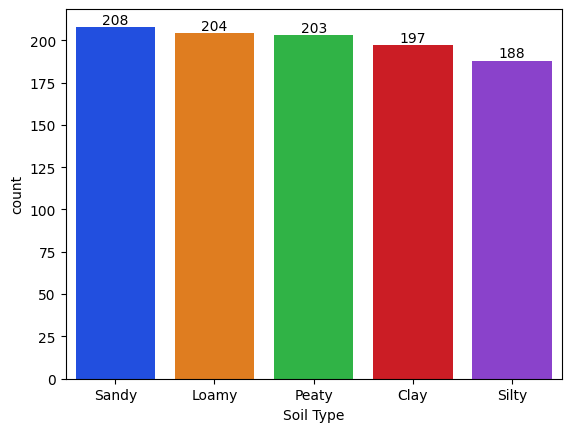

In [5]:
ax = sns.countplot(x='Soil Type', data=df, palette='bright')
for container in ax.containers:
    ax.bar_label(container, fontsize=10, color='black')
plt.show()

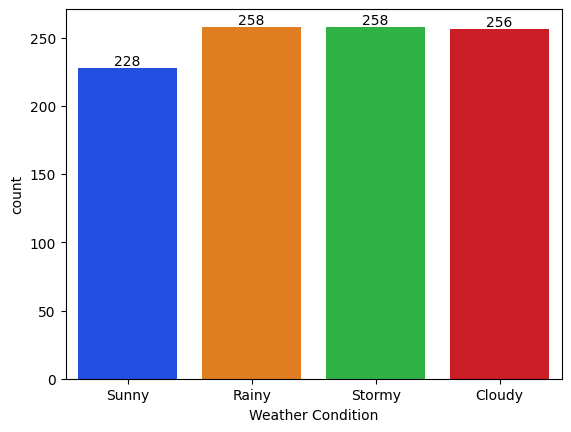

In [6]:
ax = sns.countplot(x='Weather Condition', data=df, palette='bright')
for container in ax.containers:
    ax.bar_label(container, fontsize=10, color='black')
plt.show()

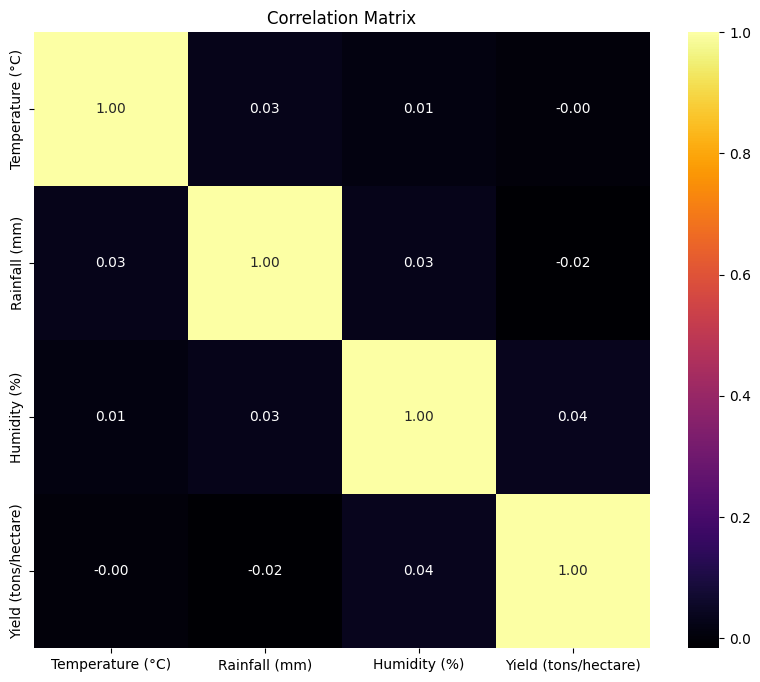

In [11]:
numerical_data = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numerical_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='inferno', cbar=True, square=True)
plt.title('Correlation Matrix')
plt.show()

In [12]:
one_hot = pd.get_dummies(df[["Soil Type","Weather Condition","Crop Type"]])
df = pd.concat([df, one_hot], axis=1)
df.head()

,Temperature (°C),Rainfall (mm),Humidity (%),Soil Type,Weather Condition,Crop Type,Yield (tons/hectare),Soil Type_Clay,Soil Type_Loamy,Soil Type_Peaty,...,Soil Type_Silty,Weather Condition_Cloudy,Weather Condition_Rainy,Weather Condition_Stormy,Weather Condition_Sunny,Crop Type_Barley,Crop Type_Corn,Crop Type_Rice,Crop Type_Soybeans,Crop Type_Wheat
0,22.490802,185.132929,53.085284,Sandy,Sunny,Barley,2.818937,False,False,False,...,False,False,False,False,True,True,False,False,False,False
1,34.014286,541.900947,52.348940,Loamy,Sunny,Corn,8.014166,False,True,False,...,False,False,False,False,True,False,True,False,False,False
2,29.639879,872.945836,85.312729,Peaty,Rainy,Wheat,9.249868,False,False,True,...,False,False,True,False,False,False,False,False,False,True
3,26.973170,732.224886,52.477310,Sandy,Sunny,Soybeans,7.947481,False,False,False,...,False,False,False,False,True,False,False,False,True,False
4,18.120373,806.561148,53.597486,Clay,Stormy,Barley,6.262616,True,False,False,...,False,False,False,True,False,True,False,False,False,False


In [13]:
df.drop(["Soil Type","Weather Condition","Crop Type"],inplace=True,axis=1)
df.head()

,Temperature (°C),Rainfall (mm),Humidity (%),Yield (tons/hectare),Soil Type_Clay,Soil Type_Loamy,Soil Type_Peaty,Soil Type_Sandy,Soil Type_Silty,Weather Condition_Cloudy,Weather Condition_Rainy,Weather Condition_Stormy,Weather Condition_Sunny,Crop Type_Barley,Crop Type_Corn,Crop Type_Rice,Crop Type_Soybeans,Crop Type_Wheat
0,22.490802,185.132929,53.085284,2.818937,False,False,False,True,False,False,False,False,True,True,False,False,False,False
1,34.014286,541.900947,52.348940,8.014166,False,True,False,False,False,False,False,False,True,False,True,False,False,False
2,29.639879,872.945836,85.312729,9.249868,False,False,True,False,False,False,True,False,False,False,False,False,False,True
3,26.973170,732.224886,52.477310,7.947481,False,False,False,True,False,False,False,False,True,False,False,False,True,False
4,18.120373,806.561148,53.597486,6.262616,True,False,False,False,False,False,False,True,False,True,False,False,False,False


In [14]:
x=df.drop(["Yield (tons/hectare)"],axis=1)
y=df["Yield (tons/hectare)"]

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [33]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
model = RandomForestRegressor(random_state=42)
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt'],
    'bootstrap': [True, False]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [10, 20, 30, None],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error', verbose=2)

In [35]:
print(f"Best Parameters: {grid_search.best_params_}")

Best Parameters: {'bootstrap': True, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}


In [36]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)

In [37]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

Mean Squared Error (MSE): 5.048350924762064
R-squared (R2): 0.0019119861215978196


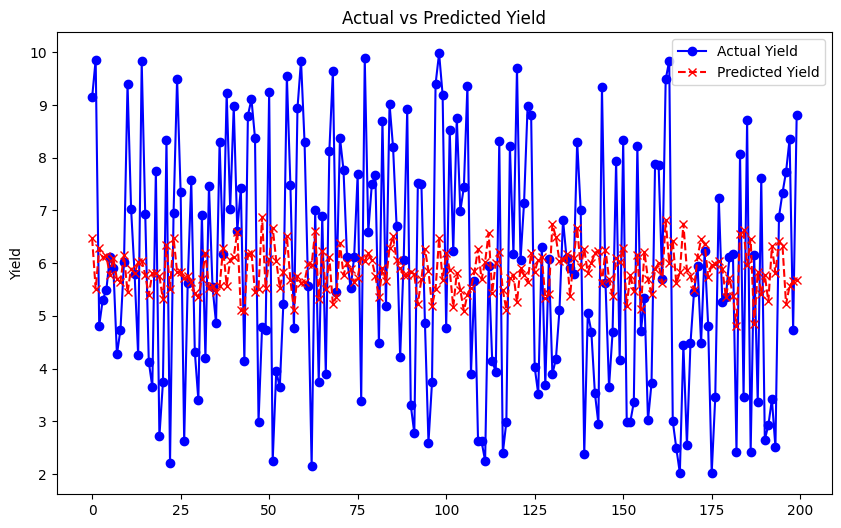

In [38]:
plt.figure(figsize=(10, 6))

plt.plot(range(len(y_test)), y_test, label="Actual Yield", color="blue", marker='o')
plt.plot(range(len(y_pred)), y_pred, label="Predicted Yield", color="red", linestyle='--', marker='x')

plt.ylabel("Yield")
plt.title("Actual vs Predicted Yield")
plt.legend()
plt.show()

In [39]:
import joblib
joblib.dump(model, '/content/drive/MyDrive/crop_model.pkl')

['/content/drive/MyDrive/crop_model.pkl']